In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import plot_importance

In [2]:
df = pd.read_csv('features.csv')

## EDA

In [3]:
df.head()

,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Partials,MFCC,Spectral Rolloff,Sex,Age,Species,Call
0,706,1,0.083313,0.015951,848.0,263.00,2,-9.426433,1526.165771,NaN,A,A. jubatus,growl
1,3456,4,0.296424,0.035485,3645.5,452.25,21,-8.885845,1377.502653,NaN,A,A. jubatus,NaN
2,2984,5,0.171860,0.022913,2181.8,308.00,8,-8.680822,1011.861165,NaN,A,A. jubatus,growl
3,3108,5,0.243933,0.023587,3437.0,314.00,11,-9.252319,1207.803345,NaN,A,A. jubatus,NaN
4,1919,3,0.194653,0.029304,2189.0,331.00,5,-8.418487,942.326097,NaN,A,A. jubatus,growl


In [4]:
df.shape

(345, 13)

In [5]:
df.columns.values 

array(['Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp', 'Freq_range',
       'Pulses_per_Sec', 'Partials', 'MFCC', 'Spectral Rolloff', 'Sex',
       'Age', 'Species', 'Call'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Zero_Crossings    345 non-null    int64  
 1   Duration          345 non-null    int64  
 2   Amp_range         345 non-null    float64
 3   Avg_amp           345 non-null    float64
 4   Freq_range        345 non-null    float64
 5   Pulses_per_Sec    345 non-null    float64
 6   Partials          345 non-null    int64  
 7   MFCC              345 non-null    float64
 8   Spectral Rolloff  345 non-null    float64
 9   Sex               288 non-null    object 
 10  Age               321 non-null    object 
 11  Species           345 non-null    object 
 12  Call              332 non-null    object 
dtypes: float64(6), int64(3), object(4)
memory usage: 35.2+ KB


In [7]:
df.describe(include='all')

,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Partials,MFCC,Spectral Rolloff,Sex,Age,Species,Call
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,288,321,345,332
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,6,6,21
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,Adult,Ocelot,growl
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150,222,113,175
mean,7454.376812,4.568116,0.193067,0.022058,4195.061470,528.947249,8.808696,-14.100153,3190.476881,NaN,NaN,NaN,NaN
std,9854.288447,3.360444,0.159222,0.019124,2939.386729,521.728433,9.847289,9.356814,1899.509704,NaN,NaN,NaN,NaN
min,427.000000,1.000000,0.003207,0.000551,1.000000,0.000000,0.000000,-33.520592,472.488169,NaN,NaN,NaN,NaN
25%,2342.000000,2.000000,0.065102,0.006419,2217.000000,227.000000,2.000000,-22.400394,1438.990528,NaN,NaN,NaN,NaN
50%,3895.000000,4.000000,0.166533,0.017938,3645.500000,369.333333,6.000000,-10.556380,3085.956468,NaN,NaN,NaN,NaN
75%,9444.000000,5.000000,0.283173,0.031444,5434.250000,658.000000,13.000000,-5.916595,4597.587806,NaN,NaN,NaN,NaN


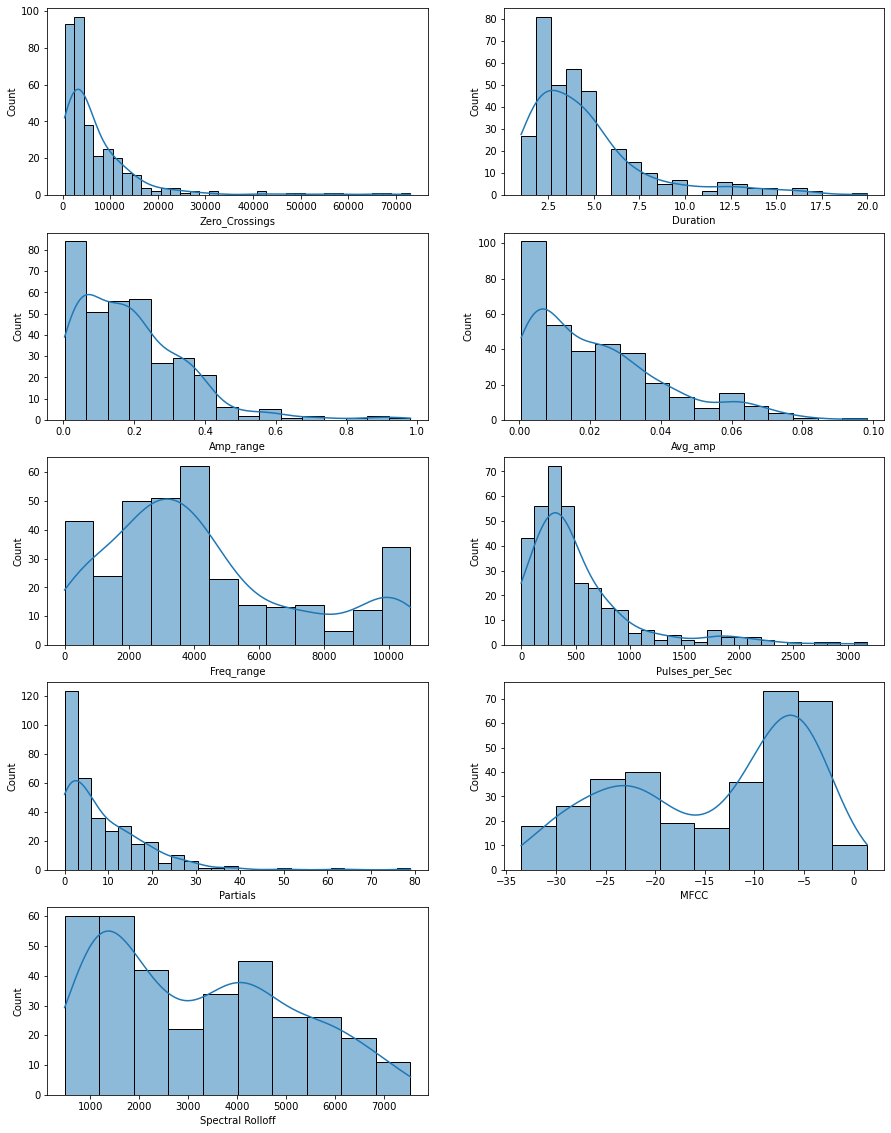

In [8]:
#Histogram to check distribution and skewness
l= ['Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp', 'Freq_range',
    'Pulses_per_Sec', 'Partials', 'MFCC', 'Spectral Rolloff']

plt.figure(figsize=(15,20))
for i in range(len(l)):
    plt.subplot(5,2,i+1)
    sns.histplot(df[l[i]],kde=True) 
plt.show()

C:\Users\exant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\exant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\exant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\exant\anaconda3\lib\si

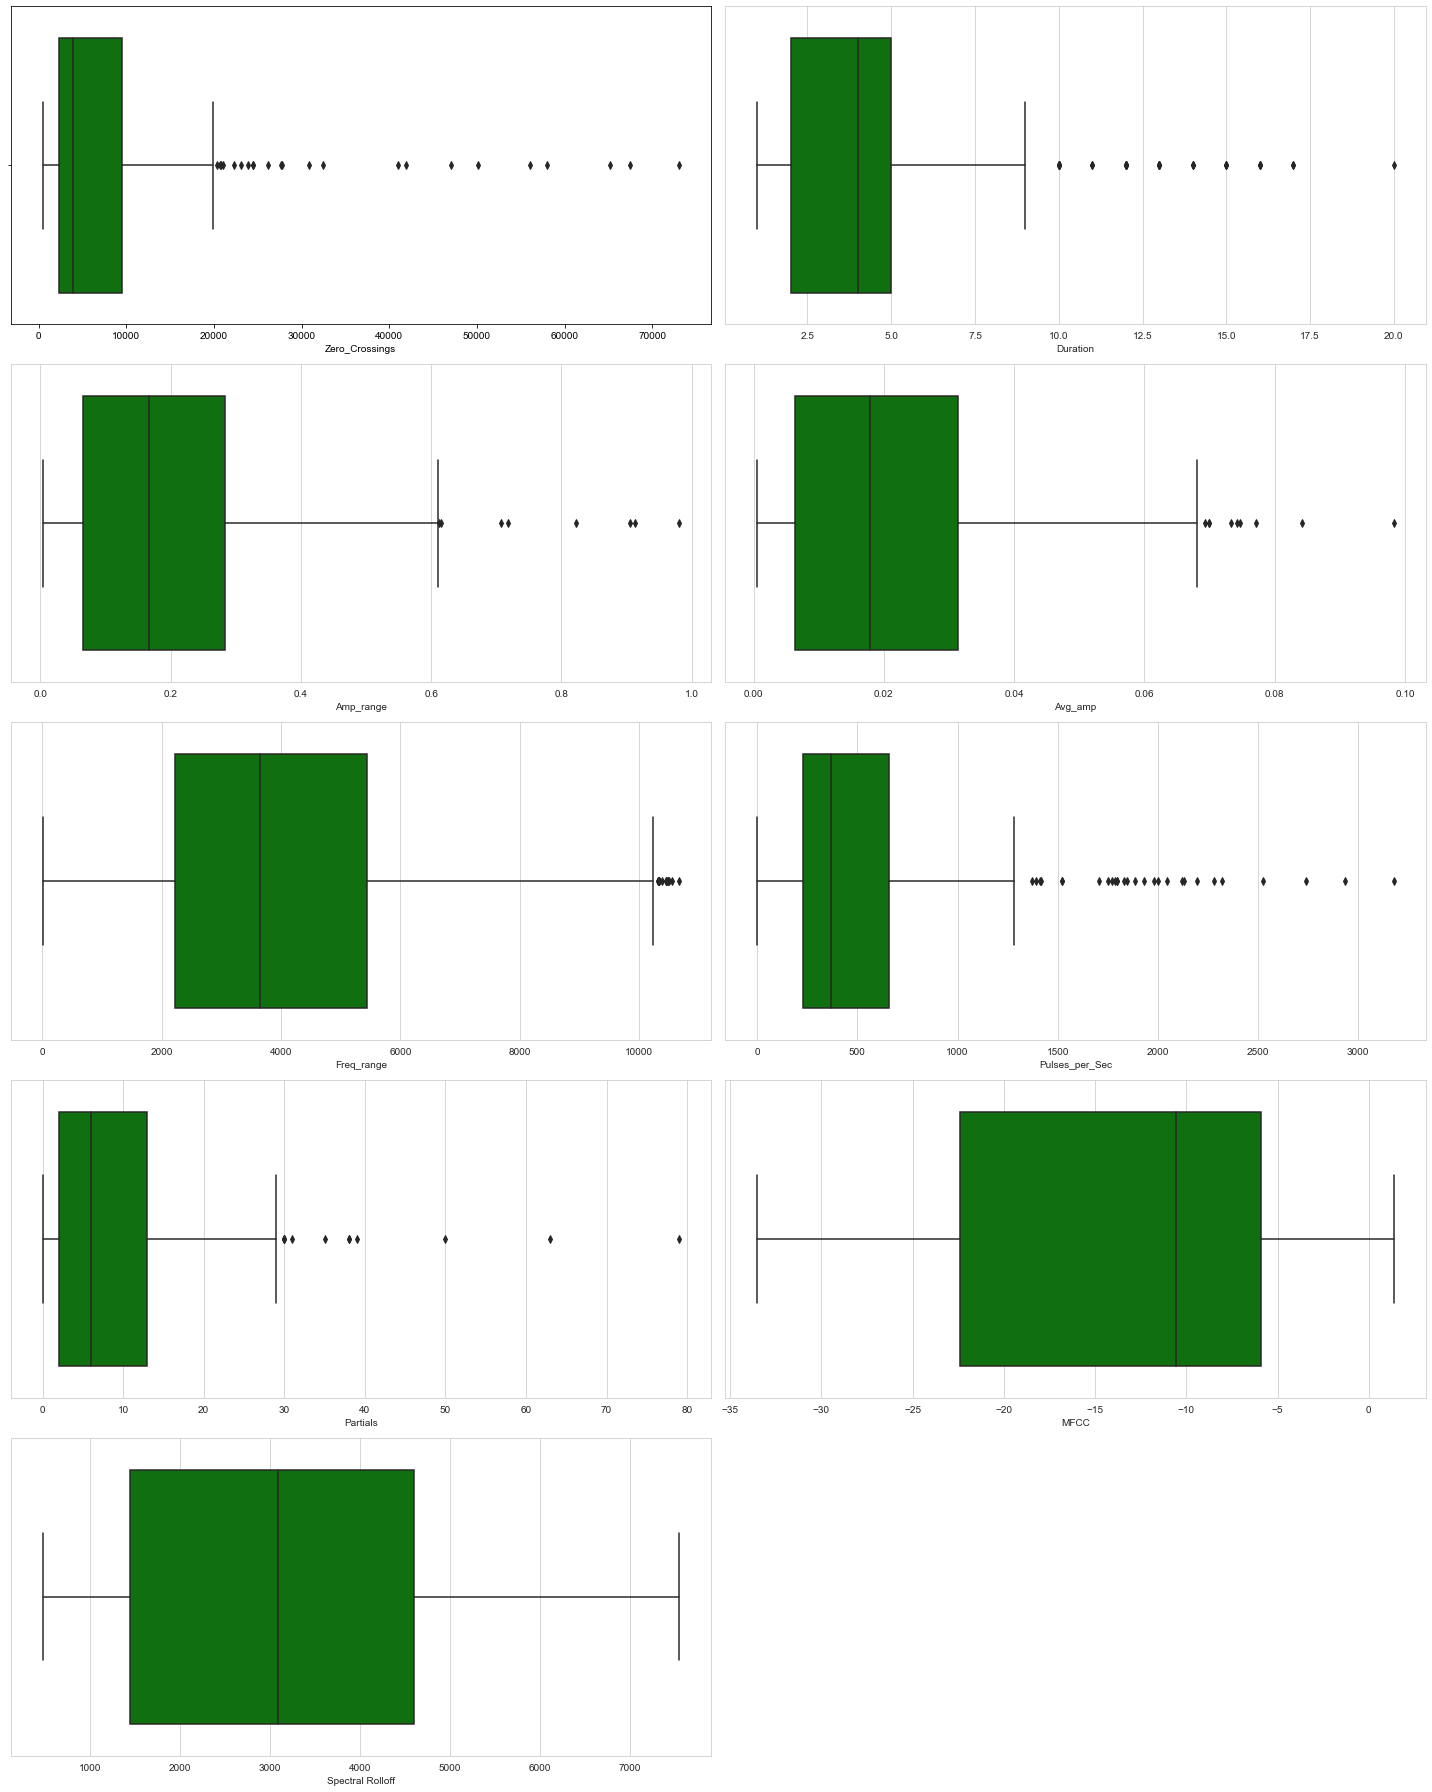

In [9]:
#Boxplot to check for outliers
l= ['Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp', 'Freq_range',
    'Pulses_per_Sec', 'Partials', 'MFCC', 'Spectral Rolloff']

plt.figure(figsize=(20,25))

for i in range(0,len(l)):
    plt.subplot(5,2,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='h')
    plt.tight_layout()
plt.show()    

<AxesSubplot:>

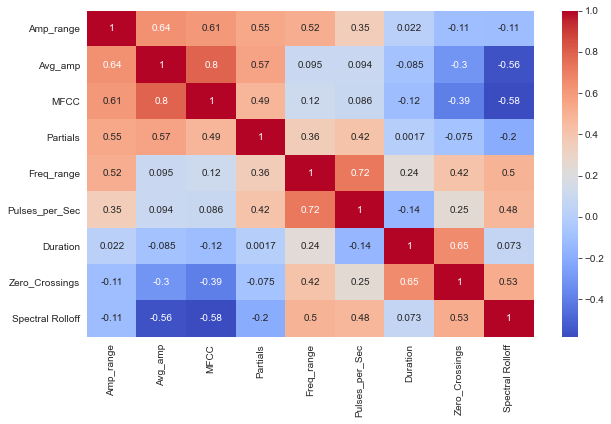

In [10]:
#Quality correlation matrix
k = 9 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Amp_range')['Amp_range'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'coolwarm')

In [11]:
df['Call'].value_counts()

growl               175
main call            46
call                 21
hiss                 20
growl?               19
call?                 8
purr                  7
roar                  5
purr sequence         4
call sequence         4
Hiss                  4
roar?                 4
call/growl            4
Growl                 3
roar or call          2
Sharp Hiss            1
Loud rumble/roar      1
hiss?                 1
unknown               1
growl                 1
growl/hiss            1
Name: Call, dtype: int64

In [12]:
df['Species'].value_counts()

Ocelot            113
L. lynx            81
Domestic Cat       58
A. jubatus         53
Caracal Carcal     30
Bobcat             10
Name: Species, dtype: int64

## Data Cleansing

In [13]:
df['Call'].unique()

array(['growl', nan, 'growl?', 'hiss', 'hiss?', 'call', 'unknown',
       'growl/hiss', 'call sequence', 'purr', 'purr sequence', 'Growl',
       'Hiss', 'Loud rumble/roar', 'Sharp Hiss', 'call?', 'roar',
       'roar or call', 'growl ', 'roar?', 'main call', 'call/growl'],
      dtype=object)

In [14]:
clean = {'unknown':np.NaN, 'growl?': 'growl','Growl':'growl', 'growl ':'growl', 'hiss?':'hiss', 'Hiss':'hiss', 
         'Sharp Hiss':'hiss', 'purr sequence': 'purr', 'Loud rumble/roar':'roar', 'call?':'call', 'main call':'call', 
         'call sequence':'call', 'roar or call':'roar', 'roar?':'roar', 'purr sequence':'purr', ' roar':'roar', 'hiss ':'hiss', 
         'mew?':'mew', 'Call sequence(possible mew)':'call', 'call sequence?':'call', 'single call?':'call', 
         'grow/hiss':'growl/hiss'}
df.replace(clean, inplace = True)
df['Call'].unique()

array(['growl', nan, 'hiss', 'call', 'growl/hiss', 'purr', 'roar',
       'call/growl'], dtype=object)

In [15]:
df['Age'].unique()

array(['A', 'Adult', 'Adult ', 'Juvenile ', 'juvenile', nan, 'Juvenile'],
      dtype=object)

In [16]:
clean2 = {'A':'Adult','Adult ':'Adult', 'Juvenile ':'Juvenile', 'juvenile':'Juvenile'}

df.replace(clean2, inplace = True)
df['Age'].fillna('Unknown', inplace = True)
df['Age'].unique()

array(['Adult', 'Juvenile', 'Unknown'], dtype=object)

In [17]:
df['Sex'].unique()

array([nan, 'G (1 M and 2F)', 'P', 'F', 'Pair (Unknown)', 'Female ',
       'Male', 'male ', 'G', 'Female', 'M'], dtype=object)

In [18]:
clean3 = {'Female ':'Female','F':'Female', 'M':'Male','male ':'Male', 'P':'Pair', 'Pair (Unknown)':'Pair', 'G':'Group', 'G (1 M and 2F)':'Group'}

df.replace(clean3, inplace = True)
df['Sex'].fillna('Unknown', inplace = True)
df['Sex'].unique()

array(['Unknown', 'Group', 'Pair', 'Female', 'Male'], dtype=object)

In [19]:
df.describe(include='object')

,Sex,Age,Species,Call
count,345,345,345,331
unique,5,3,6,7
top,Male,Adult,Ocelot,growl
freq,157,300,113,198


## Standardize Continuous Features

In [20]:
continuous = ['Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp', 'Freq_range',
       'Pulses_per_Sec', 'Partials', 'MFCC', 'Spectral Rolloff']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [21]:
df.describe(include='float64')

,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Partials,MFCC,Spectral Rolloff
count,3.450000e+02,3.450000e+02,3.450000e+02,3.450000e+02,3.450000e+02,3.450000e+02,3.450000e+02,3.450000e+02,3.450000e+02
mean,2.284807e-17,1.570402e-16,-1.512478e-16,-4.505253e-17,-7.047503e-17,9.428851e-17,-5.273559e-17,-6.436076e-17,-9.975917e-17
std,1.001452e+00,1.001452e+00,1.001452e+00,1.001452e+00,1.001452e+00,1.001452e+00,1.001452e+00,1.001452e+00,1.001452e+00
min,-7.141646e-01,-1.063341e+00,-1.194162e+00,-1.126237e+00,-1.428922e+00,-1.015309e+00,-8.958292e-01,-2.078554e+00,-1.432968e+00
25%,-5.195507e-01,-7.653292e-01,-8.048612e-01,-8.189384e-01,-6.739278e-01,-5.795847e-01,-6.924327e-01,-8.883683e-01,-9.234121e-01
50%,-3.617254e-01,-1.693053e-01,-1.668924e-01,-2.157645e-01,-1.872362e-01,-3.063773e-01,-2.856395e-01,3.792872e-01,-5.510486e-02
75%,2.021976e-01,1.287066e-01,5.667309e-01,4.914766e-01,4.221930e-01,2.477154e-01,4.262485e-01,8.758798e-01,7.418518e-01
max,6.667444e+00,4.598885e+00,4.954065e+00,3.991341e+00,2.205883e+00,5.083870e+00,7.138335e+00,1.654952e+00,2.296260e+00


In [22]:
#Save new clean data to new CSV
df.to_csv('features_cleaned.csv', index=False)

## Convert categorical variables into dummy/indicator variables

In [23]:
categorical = ['Sex', 'Age', 'Species']

for var in categorical:
    df = pd.concat([df, pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Zero_Crossings          345 non-null    float64
 1   Duration                345 non-null    float64
 2   Amp_range               345 non-null    float64
 3   Avg_amp                 345 non-null    float64
 4   Freq_range              345 non-null    float64
 5   Pulses_per_Sec          345 non-null    float64
 6   Partials                345 non-null    float64
 7   MFCC                    345 non-null    float64
 8   Spectral Rolloff        345 non-null    float64
 9   Call                    331 non-null    object 
 10  Sex_Female              345 non-null    uint8  
 11  Sex_Group               345 non-null    uint8  
 12  Sex_Male                345 non-null    uint8  
 13  Sex_Pair                345 non-null    uint8  
 14  Sex_Unknown             345 non-null    ui

# Vocalization Classification

## Splitting data

In [24]:
X = df[pd.notnull(df['Call'])].drop(['Call'], axis=1)
y = df[pd.notnull(df['Call'])]['Call']

In [25]:
print(X.shape)
print(y.shape)

(331, 23)
(331,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [27]:
print(X_train.shape)
print(X_test.shape)

(231, 23)
(100, 23)


In [28]:
print('Call values for Data')
print(df['Call'].value_counts())
print('\n')
print('Call values for Training')
print(y_train.value_counts())
print('\n')
print('Call values for Testing')
print(y_test.value_counts())

Call values for Data
growl         198
call           79
hiss           26
roar           12
purr           11
call/growl      4
growl/hiss      1
Name: Call, dtype: int64


Call values for Training
growl         143
call           48
hiss           18
roar           10
purr            9
call/growl      2
growl/hiss      1
Name: Call, dtype: int64


Call values for Testing
growl         55
call          31
hiss           8
roar           2
call/growl     2
purr           2
Name: Call, dtype: int64


In [29]:
print('Calls trained for but not tested for')
print(set(np.unique(y_train))-set(np.unique(y_test)))
print('Calls test for but not trained for')
print(set(np.unique(y_test))-set(np.unique(y_train)))

Calls trained for but not tested for
{'growl/hiss'}
Calls test for but not trained for
set()


## XGBoost

In [30]:
parameters = dict(
    objective='multi:softprob',
    random_state = 30,
    max_depth=9,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.4,
    tree_method='gpu_hist')
#eval_metric='mlogloss'

clf = XGBClassifier(**parameters, n_estimators=1200)

In [31]:
clf.fit(X_train, y_train)

C:\Users\exant\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1200, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=30, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [32]:
clf.score(X_train, y_train)

1.0

In [33]:
clf.score(X_test,y_test)

0.78

In [34]:
y_pred = clf.predict(X_test)

In [35]:
print('1. Tested Calls')
print(np.unique(y_test))
print('2. Predicted Calls')
print(np.unique(y_pred))
print('3. Not tested for but predicted')
print(set(np.unique(y_pred))-set(np.unique(y_test)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test))-set(np.unique(y_pred)))

1. Tested Calls
['call' 'call/growl' 'growl' 'hiss' 'purr' 'roar']
2. Predicted Calls
['call' 'growl' 'hiss' 'purr' 'roar']
3. Not tested for but predicted
set()
4. Tested for but not predicted
{'call/growl'}


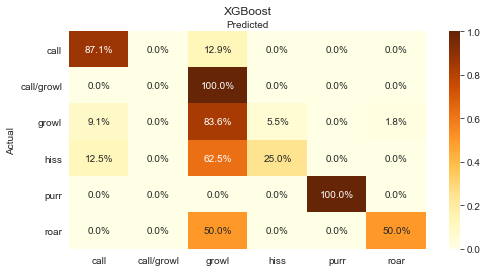

Accuracy 0.78


In [36]:
names = sorted(list(set(np.unique(y_test)).union(set(y_pred))))
cnf = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,4))

# Normalise
cnf = cnf.astype('float')/cnf.sum(axis=1)[:, np.newaxis]

sns.heatmap(cnf, annot=True, fmt='.1%', xticklabels=names, yticklabels=names,cmap= "YlOrBr")
plt.title('XGBoost')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print('Accuracy',clf.score(X_test, y_test))

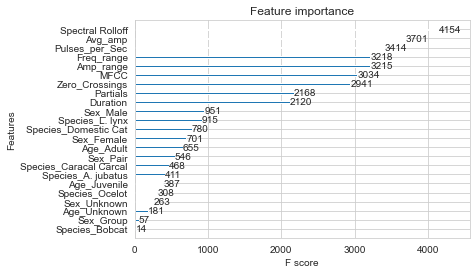

In [37]:
plot_importance(clf)
figsize=(5,10)

## SVM

In [38]:
clf_svc = SVC()

In [39]:
clf_svc.fit(X_train, y_train)

SVC()

In [40]:
clf_svc.score(X_train, y_train)

0.8701298701298701

In [41]:
clf_svc.score(X_test, y_test)

0.77

In [42]:
y_pred_svc=clf_svc.predict(X_test)

In [43]:
print('1. Tested Calls')
print(np.unique(y_test))
print('2. Predicted Calls')
print(np.unique(y_pred_svc))
print('3. False Positive')
print(set(np.unique(y_pred_svc))-set(np.unique(y_test)))
print('4. False Negative')
print(set(np.unique(y_test))-set(np.unique(y_pred_svc)))

1. Tested Calls
['call' 'call/growl' 'growl' 'hiss' 'purr' 'roar']
2. Predicted Calls
['call' 'growl' 'hiss' 'purr']
3. False Positive
set()
4. False Negative
{'call/growl', 'roar'}


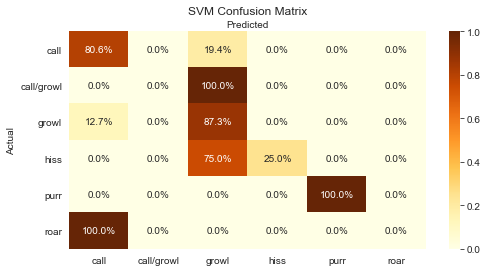

Accuracy 0.77


In [44]:
names_svc = sorted(list(set(np.unique(y_test)).union(set(y_pred_svc))))
cnf = confusion_matrix(y_test, y_pred_svc)
fig, ax = plt.subplots(figsize=(8,4))

# Normalise
cnf = cnf.astype('float')/cnf.sum(axis=1)[:, np.newaxis]

sns.heatmap(cnf, annot=True, fmt='.1%', xticklabels=names_svc, yticklabels=names_svc,cmap= "YlOrBr")
plt.title('SVM Confusion Matrix')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print('Accuracy',clf_svc.score(X_test, y_test))


## Naive Bayes

In [45]:
gnb = GaussianNB()

In [46]:
gnb.fit(X_train, y_train)

GaussianNB()

In [47]:
gnb.score(X_train, y_train)

0.3463203463203463

In [48]:
gnb.score(X_test, y_test)

0.23

In [49]:
y_pred_nb = gnb.predict(X_test)

In [50]:
print('1. Tested Calls')
print(np.unique(y_test))
print('2. Predicted Calls')
print(np.unique(y_pred_nb))
print('3. Not tested for but predicted')
print(set(np.unique(y_pred_nb))-set(np.unique(y_test)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test))-set(np.unique(y_pred_nb)))

1. Tested Calls
['call' 'call/growl' 'growl' 'hiss' 'purr' 'roar']
2. Predicted Calls
['call' 'call/growl' 'growl' 'hiss' 'purr' 'roar']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


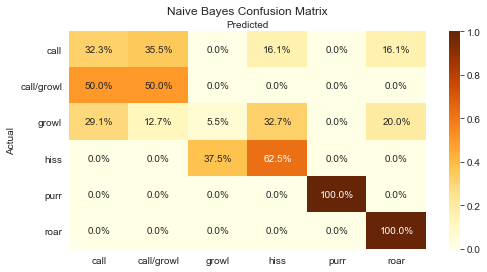

Accuracy 0.23


In [51]:
names_nb = sorted(list(set(np.unique(y_test)).union(set(y_pred_nb))))
cnf = confusion_matrix(y_test, y_pred_nb)
fig, ax = plt.subplots(figsize=(8,4))

# Normalise
cnf = cnf.astype('float')/cnf.sum(axis=1)[:, np.newaxis]

sns.heatmap(cnf, annot=True, fmt='.1%', xticklabels=names_nb, yticklabels=names_nb,cmap= "YlOrBr")
plt.title('Naive Bayes Confusion Matrix')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print('Accuracy',gnb.score(X_test, y_test))

## Logistic Regression

In [52]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr')

In [53]:
lr.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [54]:
lr.score(X_train, y_train)

0.8225108225108225

In [55]:
lr.score(X_test, y_test)

0.73

In [56]:
y_pred_lr = lr.predict(X_test)

In [57]:
print('1. Tested Calls')
print(np.unique(y_test))
print('2. Predicted Calls')
print(np.unique(y_pred_lr))
print('3. Not tested for but predicted')
print(set(np.unique(y_pred_lr))-set(np.unique(y_test)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test))-set(np.unique(y_pred_lr)))

1. Tested Calls
['call' 'call/growl' 'growl' 'hiss' 'purr' 'roar']
2. Predicted Calls
['call' 'growl' 'hiss' 'purr' 'roar']
3. Not tested for but predicted
set()
4. Tested for but not predicted
{'call/growl'}


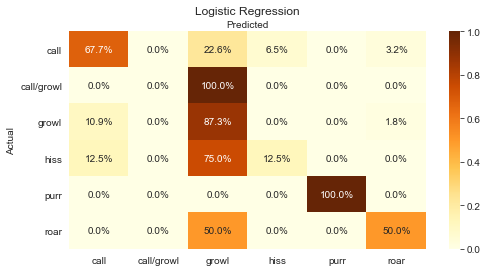

Accuracy 0.73


In [58]:
names_lr = sorted(list(set(np.unique(y_test)).union(set(y_pred_lr))))
cnf = confusion_matrix(y_test, y_pred_lr)
fig, ax = plt.subplots(figsize=(8,4))

# Normalise
cnf = cnf.astype('float')/cnf.sum(axis=1)[:, np.newaxis]

sns.heatmap(cnf, annot=True, fmt='.1%', xticklabels=names_lr, yticklabels=names_lr,cmap= "YlOrBr")
plt.title('Logistic Regression')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print('Accuracy',lr.score(X_test, y_test))

## KNN

In [59]:
knn = KNeighborsClassifier()

In [60]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
knn.score(X_train, y_train)

0.8658008658008658

In [62]:
knn.score(X_test, y_test)

0.79

In [63]:
y_pred_knn = knn.predict(X_test)

In [64]:
print('1. Tested Calls')
print(np.unique(y_test))
print('2. Predicted Calls')
print(np.unique(y_pred_knn))
print('3. Not tested for but predicted')
print(set(np.unique(y_pred_knn))-set(np.unique(y_test)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test))-set(np.unique(y_pred_knn)))

1. Tested Calls
['call' 'call/growl' 'growl' 'hiss' 'purr' 'roar']
2. Predicted Calls
['call' 'growl' 'hiss' 'purr']
3. Not tested for but predicted
set()
4. Tested for but not predicted
{'call/growl', 'roar'}


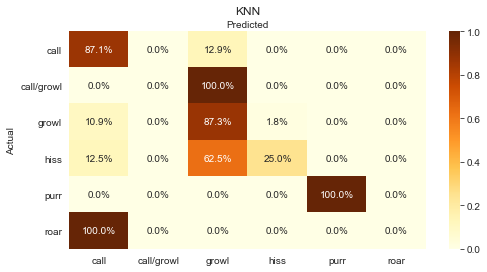

Accuracy 0.79


In [65]:
names_knn = sorted(list(set(np.unique(y_test)).union(set(y_pred_knn))))
cnf = confusion_matrix(y_test, y_pred_knn)
fig, ax = plt.subplots(figsize=(8,4))

#Normalise
cnf = cnf.astype('float')/cnf.sum(axis=1)[:, np.newaxis]

sns.heatmap(cnf, annot=True, fmt='.1%', xticklabels=names_knn, yticklabels=names_knn,cmap= "YlOrBr")
plt.title('KNN')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print('Accuracy',knn.score(X_test, y_test))

## Decision Tree Classifier

In [66]:
cart = DecisionTreeClassifier()

In [67]:
cart.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
cart.score(X_train, y_train)

1.0

In [69]:
cart.score(X_test, y_test)

0.74

In [70]:
y_pred_cart = cart.predict(X_test)

In [71]:
print('1. Tested Calls')
print(np.unique(y_test))
print('2. Predicted Calls')
print(np.unique(y_pred_cart))
print('3. Not tested for but predicted')
print(set(np.unique(y_pred_cart))-set(np.unique(y_test)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test))-set(np.unique(y_pred_cart)))

1. Tested Calls
['call' 'call/growl' 'growl' 'hiss' 'purr' 'roar']
2. Predicted Calls
['call' 'growl' 'hiss' 'purr' 'roar']
3. Not tested for but predicted
set()
4. Tested for but not predicted
{'call/growl'}


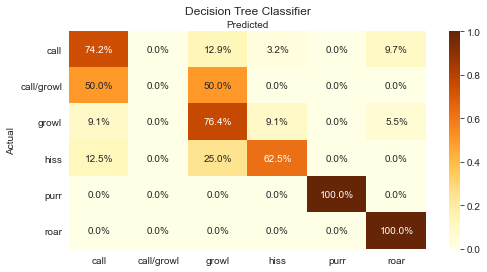

Accuracy 0.74


In [72]:
names_cart = sorted(list(set(np.unique(y_test)).union(set(y_pred_cart))))
cnf = confusion_matrix(y_test, y_pred_cart)
fig, ax = plt.subplots(figsize=(8,4))

# Normalise
cnf = cnf.astype('float')/cnf.sum(axis=1)[:, np.newaxis]

sns.heatmap(cnf, annot=True, fmt='.1%', xticklabels=names_cart, yticklabels=names_cart,cmap= "YlOrBr")
plt.title('Decision Tree Classifier')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print('Accuracy',cart.score(X_test, y_test))

## Random Forest Classifier

In [73]:
rf = RandomForestClassifier()

In [74]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
rf.score(X_train, y_train)

1.0

In [76]:
rf.score(X_test, y_test)

0.8

In [77]:
y_pred_rf = cart.predict(X_test)

In [78]:
print('1. Tested Calls')
print(np.unique(y_test))
print('2. Predicted Calls')
print(np.unique(y_pred_rf))
print('3. Not tested for but predicted')
print(set(np.unique(y_pred_rf))-set(np.unique(y_test)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test))-set(np.unique(y_pred_rf)))

1. Tested Calls
['call' 'call/growl' 'growl' 'hiss' 'purr' 'roar']
2. Predicted Calls
['call' 'growl' 'hiss' 'purr' 'roar']
3. Not tested for but predicted
set()
4. Tested for but not predicted
{'call/growl'}


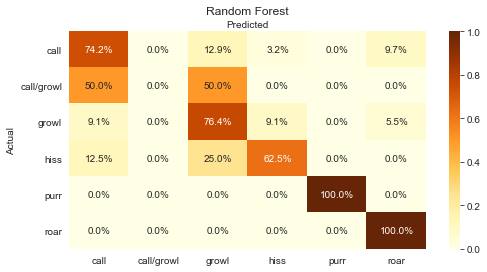

Accuracy 0.8


In [79]:
names_rf = sorted(list(set(np.unique(y_test)).union(set(y_pred_rf))))
cnf = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(figsize=(8,4))

# Normalise
cnf = cnf.astype('float')/cnf.sum(axis=1)[:, np.newaxis]

sns.heatmap(cnf, annot=True, fmt='.1%', xticklabels=names_rf, yticklabels=names_rf,cmap= "YlOrBr")
plt.title('Random Forest')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print('Accuracy',rf.score(X_test, y_test))

In [80]:
#The data is unbalanced, this could be fixed by updating the class weights 
#Or getting more varied data
df['Call'].value_counts()

growl         198
call           79
hiss           26
roar           12
purr           11
call/growl      4
growl/hiss      1
Name: Call, dtype: int64

# Species Classification

In [81]:
df2= pd.read_csv('features_cleaned.csv')

In [82]:
df2.head()

,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Partials,MFCC,Spectral Rolloff,Sex,Age,Species,Call
0,-0.685811,-1.063341,-0.690319,-0.319814,-1.140348,-0.510483,-0.692433,0.500225,-0.877452,Unknown,Adult,A. jubatus,growl
1,-0.406339,-0.169305,0.650078,0.703085,-0.187236,-0.147220,1.239835,0.558083,-0.955830,Unknown,Adult,A. jubatus,NaN
2,-0.454307,0.128707,-0.133389,0.044783,-0.685920,-0.424106,-0.082243,0.580027,-1.148602,Unknown,Adult,A. jubatus,growl
3,-0.441705,0.128707,0.319927,0.080046,-0.258272,-0.412589,0.222852,0.518860,-1.045298,Unknown,Adult,A. jubatus,NaN
4,-0.562538,-0.467317,0.009971,0.379435,-0.683467,-0.379958,-0.387338,0.608104,-1.185262,Unknown,Adult,A. jubatus,growl


In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Zero_Crossings    345 non-null    float64
 1   Duration          345 non-null    float64
 2   Amp_range         345 non-null    float64
 3   Avg_amp           345 non-null    float64
 4   Freq_range        345 non-null    float64
 5   Pulses_per_Sec    345 non-null    float64
 6   Partials          345 non-null    float64
 7   MFCC              345 non-null    float64
 8   Spectral Rolloff  345 non-null    float64
 9   Sex               345 non-null    object 
 10  Age               345 non-null    object 
 11  Species           345 non-null    object 
 12  Call              331 non-null    object 
dtypes: float64(9), object(4)
memory usage: 35.2+ KB


## Convert categorical variables into dummy/indicator variables

In [84]:
categorical = ['Sex', 'Age', 'Call']

for var in categorical:
    df2 = pd.concat([df2, pd.get_dummies(df2[var], prefix=var)], axis=1)
    del df2[var]
    
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Zero_Crossings    345 non-null    float64
 1   Duration          345 non-null    float64
 2   Amp_range         345 non-null    float64
 3   Avg_amp           345 non-null    float64
 4   Freq_range        345 non-null    float64
 5   Pulses_per_Sec    345 non-null    float64
 6   Partials          345 non-null    float64
 7   MFCC              345 non-null    float64
 8   Spectral Rolloff  345 non-null    float64
 9   Species           345 non-null    object 
 10  Sex_Female        345 non-null    uint8  
 11  Sex_Group         345 non-null    uint8  
 12  Sex_Male          345 non-null    uint8  
 13  Sex_Pair          345 non-null    uint8  
 14  Sex_Unknown       345 non-null    uint8  
 15  Age_Adult         345 non-null    uint8  
 16  Age_Juvenile      345 non-null    uint8  
 1

## Splitting data

In [85]:
X = df2[pd.notnull(df2['Species'])].drop(['Species'], axis=1)
y = df2[pd.notnull(df2['Species'])]['Species']

In [86]:
print(X.shape)
print(y.shape)

(345, 24)
(345,)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [88]:
print(X_train.shape)
print(X_test.shape)

(241, 24)
(104, 24)


In [89]:
print('Species values for Data')
print(df2['Species'].value_counts())
print('\n')
print('Species values for Training')
print(y_train.value_counts())
print('\n')
print('Species values for Testing')
print(y_test.value_counts())

Species values for Data
Ocelot            113
L. lynx            81
Domestic Cat       58
A. jubatus         53
Caracal Carcal     30
Bobcat             10
Name: Species, dtype: int64


Species values for Training
Ocelot            75
L. lynx           60
Domestic Cat      42
A. jubatus        40
Caracal Carcal    18
Bobcat             6
Name: Species, dtype: int64


Species values for Testing
Ocelot            38
L. lynx           21
Domestic Cat      16
A. jubatus        13
Caracal Carcal    12
Bobcat             4
Name: Species, dtype: int64


In [90]:
print('Species trained for but not tested for')
print(set(np.unique(y_train))-set(np.unique(y_test)))
print('Species test for but not trained for')
print(set(np.unique(y_test))-set(np.unique(y_train)))

Species trained for but not tested for
set()
Species test for but not trained for
set()


## XGBoost

In [91]:
parameters = dict(
    objective='multi:softprob',
    random_state = 30,
    max_depth=9,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.4,
    tree_method='gpu_hist')
#eval_metric='mlogloss'

clf = XGBClassifier(**parameters, n_estimators=1200)

In [92]:
clf.fit(X_train, y_train)

[19:58:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\exant\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1200, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=30, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [93]:
clf.score(X_train, y_train)

1.0

In [94]:
clf.score(X_test,y_test)

0.9038461538461539

In [95]:
y_pred = clf.predict(X_test)

In [96]:
print('1. Tested Species')
print(np.unique(y_test))
print('2. Predicted Species')
print(np.unique(y_pred))
print('3. Not tested for but predicted')
print(set(np.unique(y_pred))-set(np.unique(y_test)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test))-set(np.unique(y_pred)))

1. Tested Species
['A. jubatus' 'Bobcat' 'Caracal Carcal' 'Domestic Cat' 'L. lynx' 'Ocelot']
2. Predicted Species
['A. jubatus' 'Bobcat' 'Caracal Carcal' 'Domestic Cat' 'L. lynx' 'Ocelot']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


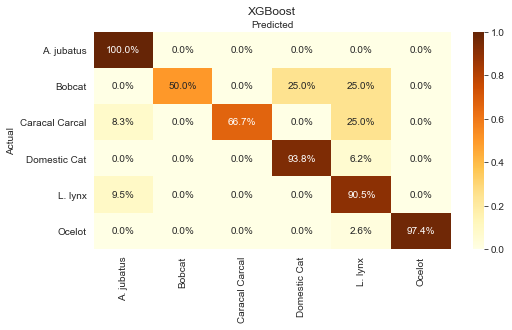

Accuracy 0.9038461538461539


In [97]:
names = sorted(list(set(np.unique(y_test)).union(set(y_pred))))
cnf = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,4))

# Normalise
cnf = cnf.astype('float')/cnf.sum(axis=1)[:, np.newaxis]

sns.heatmap(cnf, annot=True, fmt='.1%', xticklabels=names, yticklabels=names,cmap= "YlOrBr")
plt.title('XGBoost')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print('Accuracy',clf.score(X_test, y_test))

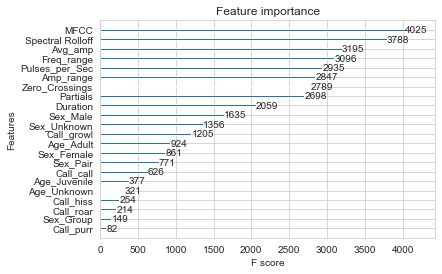

In [98]:
plot_importance(clf)
figsize=(8,4)

## SVM

In [99]:
clf_svc = SVC()

In [100]:
clf_svc.fit(X_train, y_train)

SVC()

In [101]:
clf_svc.score(X_train, y_train)

0.9377593360995851

In [102]:
clf_svc.score(X_test, y_test)

0.8653846153846154

In [103]:
y_pred_svc=clf_svc.predict(X_test)

In [104]:
print('1. Tested Species')
print(np.unique(y_test))
print('2. Predicted Species')
print(np.unique(y_pred_svc))
print('3. False Positive')
print(set(np.unique(y_pred_svc))-set(np.unique(y_test)))
print('4. False Negative')
print(set(np.unique(y_test))-set(np.unique(y_pred_svc)))

1. Tested Species
['A. jubatus' 'Bobcat' 'Caracal Carcal' 'Domestic Cat' 'L. lynx' 'Ocelot']
2. Predicted Species
['A. jubatus' 'Bobcat' 'Caracal Carcal' 'Domestic Cat' 'L. lynx' 'Ocelot']
3. False Positive
set()
4. False Negative
set()


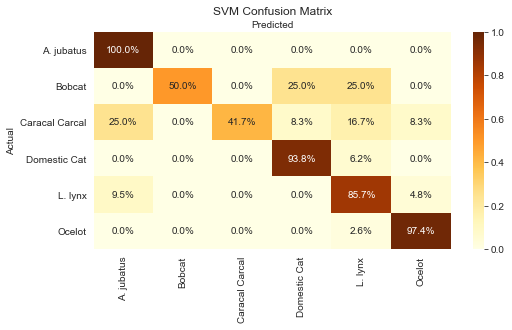

Accuracy 0.8653846153846154


In [105]:
names_svc = sorted(list(set(np.unique(y_test)).union(set(y_pred_svc))))
cnf = confusion_matrix(y_test, y_pred_svc)
fig, ax = plt.subplots(figsize=(8,4))

# Normalise
cnf = cnf.astype('float')/cnf.sum(axis=1)[:, np.newaxis]

sns.heatmap(cnf, annot=True, fmt='.1%', xticklabels=names_svc, yticklabels=names_svc,cmap= "YlOrBr")
plt.title('SVM Confusion Matrix')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print('Accuracy',clf_svc.score(X_test, y_test))


## Naive Bayes

In [106]:
gnb = GaussianNB()

In [107]:
gnb.fit(X_train, y_train)

GaussianNB()

In [108]:
gnb.score(X_train, y_train)

0.7302904564315352

In [109]:
gnb.score(X_test, y_test)

0.7307692307692307

In [110]:
y_pred_nb = gnb.predict(X_test)

In [111]:
print('1. Tested Species')
print(np.unique(y_test))
print('2. Predicted Species')
print(np.unique(y_pred_nb))
print('3. Not tested for but predicted')
print(set(np.unique(y_pred_nb))-set(np.unique(y_test)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test))-set(np.unique(y_pred_nb)))

1. Tested Species
['A. jubatus' 'Bobcat' 'Caracal Carcal' 'Domestic Cat' 'L. lynx' 'Ocelot']
2. Predicted Species
['A. jubatus' 'Bobcat' 'Caracal Carcal' 'Domestic Cat' 'L. lynx' 'Ocelot']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


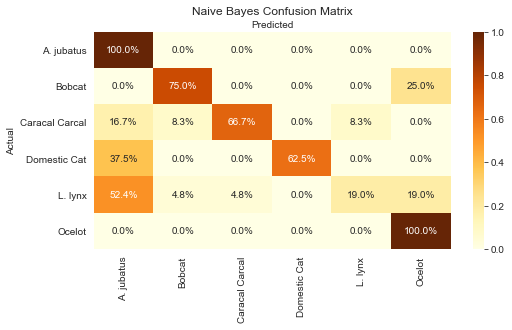

Accuracy 0.7307692307692307


In [112]:
names_nb = sorted(list(set(np.unique(y_test)).union(set(y_pred_nb))))
cnf = confusion_matrix(y_test, y_pred_nb)
fig, ax = plt.subplots(figsize=(8,4))

# Normalise
cnf = cnf.astype('float')/cnf.sum(axis=1)[:, np.newaxis]

sns.heatmap(cnf, annot=True, fmt='.1%', xticklabels=names_nb, yticklabels=names_nb,cmap= "YlOrBr")
plt.title('Naive Bayes Confusion Matrix')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print('Accuracy',gnb.score(X_test, y_test))

## Logistic Regression

In [113]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr')

In [114]:
lr.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [115]:
lr.score(X_train, y_train)

0.8921161825726142

In [116]:
lr.score(X_test, y_test)

0.8365384615384616

In [117]:
y_pred_lr = lr.predict(X_test)

In [118]:
print('1. Tested Species')
print(np.unique(y_test))
print('2. Predicted Species')
print(np.unique(y_pred_lr))
print('3. Not tested for but predicted')
print(set(np.unique(y_pred_lr))-set(np.unique(y_test)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test))-set(np.unique(y_pred_lr)))

1. Tested Species
['A. jubatus' 'Bobcat' 'Caracal Carcal' 'Domestic Cat' 'L. lynx' 'Ocelot']
2. Predicted Species
['A. jubatus' 'Bobcat' 'Caracal Carcal' 'Domestic Cat' 'L. lynx' 'Ocelot']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


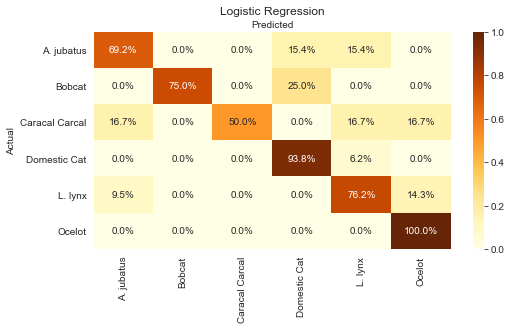

Accuracy 0.8365384615384616


In [119]:
names_lr = sorted(list(set(np.unique(y_test)).union(set(y_pred_lr))))
cnf = confusion_matrix(y_test, y_pred_lr)
fig, ax = plt.subplots(figsize=(8,4))

# Normalise
cnf = cnf.astype('float')/cnf.sum(axis=1)[:, np.newaxis]

sns.heatmap(cnf, annot=True, fmt='.1%', xticklabels=names_lr, yticklabels=names_lr,cmap= "YlOrBr")
plt.title('Logistic Regression')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print('Accuracy',lr.score(X_test, y_test))

## KNN

In [120]:
knn = KNeighborsClassifier()

In [121]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [122]:
knn.score(X_train, y_train)

0.8755186721991701

In [123]:
knn.score(X_test, y_test)

0.8461538461538461

In [124]:
y_pred_knn = knn.predict(X_test)

In [125]:
print('1. Tested Species')
print(np.unique(y_test))
print('2. Predicted Species')
print(np.unique(y_pred_knn))
print('3. Not tested for but predicted')
print(set(np.unique(y_pred_knn))-set(np.unique(y_test)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test))-set(np.unique(y_pred_knn)))

1. Tested Species
['A. jubatus' 'Bobcat' 'Caracal Carcal' 'Domestic Cat' 'L. lynx' 'Ocelot']
2. Predicted Species
['A. jubatus' 'Bobcat' 'Caracal Carcal' 'Domestic Cat' 'L. lynx' 'Ocelot']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


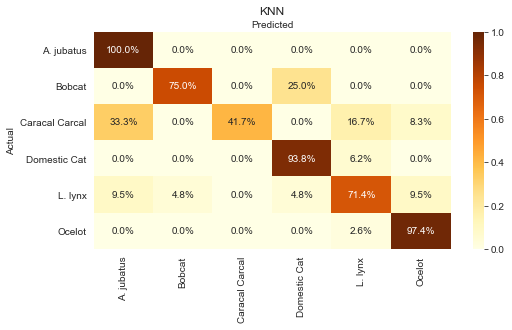

Accuracy 0.8461538461538461


In [126]:
names_knn = sorted(list(set(np.unique(y_test)).union(set(y_pred_knn))))
cnf = confusion_matrix(y_test, y_pred_knn)
fig, ax = plt.subplots(figsize=(8,4))

#Normalise
cnf = cnf.astype('float')/cnf.sum(axis=1)[:, np.newaxis]

sns.heatmap(cnf, annot=True, fmt='.1%', xticklabels=names_knn, yticklabels=names_knn,cmap= "YlOrBr")
plt.title('KNN')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print('Accuracy',knn.score(X_test, y_test))

## Decision Tree Classifier

In [127]:
cart = DecisionTreeClassifier()

In [128]:
cart.fit(X_train, y_train)

DecisionTreeClassifier()

In [129]:
cart.score(X_train, y_train)

1.0

In [130]:
cart.score(X_test, y_test)

0.8365384615384616

In [131]:
y_pred_cart = cart.predict(X_test)

In [132]:
print('1. Tested Species')
print(np.unique(y_test))
print('2. Predicted Species')
print(np.unique(y_pred_cart))
print('3. Not tested for but predicted')
print(set(np.unique(y_pred_cart))-set(np.unique(y_test)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test))-set(np.unique(y_pred_cart)))

1. Tested Species
['A. jubatus' 'Bobcat' 'Caracal Carcal' 'Domestic Cat' 'L. lynx' 'Ocelot']
2. Predicted Species
['A. jubatus' 'Bobcat' 'Caracal Carcal' 'Domestic Cat' 'L. lynx' 'Ocelot']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


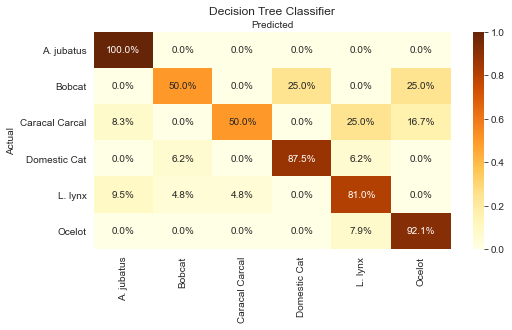

Accuracy 0.8365384615384616


In [133]:
names_cart = sorted(list(set(np.unique(y_test)).union(set(y_pred_cart))))
cnf = confusion_matrix(y_test, y_pred_cart)
fig, ax = plt.subplots(figsize=(8,4))

# Normalise
cnf = cnf.astype('float')/cnf.sum(axis=1)[:, np.newaxis]

sns.heatmap(cnf, annot=True, fmt='.1%', xticklabels=names_cart, yticklabels=names_cart,cmap= "YlOrBr")
plt.title('Decision Tree Classifier')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print('Accuracy',cart.score(X_test, y_test))

## Random Forest Classifier

In [134]:
rf = RandomForestClassifier()

In [135]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [136]:
rf.score(X_train, y_train)

1.0

In [137]:
rf.score(X_test, y_test)

0.8942307692307693

In [138]:
y_pred_rf = cart.predict(X_test)

In [139]:
print('1. Tested Species')
print(np.unique(y_test))
print('2. Predicted Species')
print(np.unique(y_pred_rf))
print('3. Not tested for but predicted')
print(set(np.unique(y_pred_rf))-set(np.unique(y_test)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test))-set(np.unique(y_pred_rf)))

1. Tested Species
['A. jubatus' 'Bobcat' 'Caracal Carcal' 'Domestic Cat' 'L. lynx' 'Ocelot']
2. Predicted Species
['A. jubatus' 'Bobcat' 'Caracal Carcal' 'Domestic Cat' 'L. lynx' 'Ocelot']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


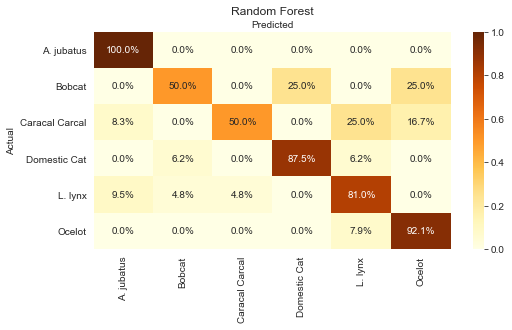

Accuracy 0.8942307692307693


In [140]:
names_rf = sorted(list(set(np.unique(y_test)).union(set(y_pred_rf))))
cnf = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(figsize=(8,4))

# Normalise
cnf = cnf.astype('float')/cnf.sum(axis=1)[:, np.newaxis]

sns.heatmap(cnf, annot=True, fmt='.1%', xticklabels=names_rf, yticklabels=names_rf,cmap= "YlOrBr")
plt.title('Random Forest')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print('Accuracy',rf.score(X_test, y_test))

#The data is unbalanced, this could be fixed by updating the class weights 
#Or getting more varied data
df2['Species'].value_counts()